In [238]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
import requests as req
import json
from citipy import citipy

#Observed Trend 1: The average temperature decreases as you travel farther from the equator
    
#Observed Trend 2: Humidity does not have a strong correlation with distance from teh equator

#Observed Trend 3: There is no strong correlation with wind speed and distance from the equator

In [239]:
url = "http://api.openweathermap.org/data/2.5/weather?"
myweatherkey = '383110043a1d03ca838185f17b637183'
units = "imperial"
location_df = pd.DataFrame()
query_url = url + "appid=" + myweatherkey + "&units=" + units + "&q="

In [242]:
#Create list of random latutudes and longitudes
for x in range(600):
    rand_latitude = np.random.uniform(low=-90.000,high=90.000,size=1)
    rand_longitude = np.random.uniform(low=-180.000,high=180.000,size=1)
    random_loc = pd.DataFrame([[rand_latitude,rand_longitude]],columns=['latitude','longitude']).astype(float)
    location_df = location_df.append(random_loc)
my_location_df = location_df.reset_index()

In [243]:
#Create random list of cities
citylist = []
row = 0
while row <600:
    latitude = my_location_df['latitude'][row]
    longitude = my_location_df['longitude'][row]
    city=citipy.nearest_city(latitude,longitude)
    cityname = city.city_name
    country_code = city.country_code
    
    if city not in citylist:
        citylist.append([cityname,country_code,latitude,longitude])
    row += 1

In [244]:
citylist_df = pd.DataFrame(citylist,columns=['cityname','country_code','latitude','longitude'])
city_length = len(citylist_df['cityname'])

In [245]:
#Create empty URL list
url_list = []   
cities = citylist_df['cityname']
cities_list = list(cities.values.flatten())

In [248]:
index = 0
for c in cities_list:
    city = c
    url_id = query_url+str(c)
    print("Record " + str(index+1) + " of " + str(city_length) + " " + str(c))
    print(url_id)
    url_list.append(url_id)  
    index +=1
url_list

Record 1 of 600 port-cartier
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=port-cartier
Record 2 of 600 mataura
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=mataura
Record 3 of 600 port-gentil
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=port-gentil
Record 4 of 600 broome
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=broome
Record 5 of 600 mys shmidta
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=mys shmidta
Record 6 of 600 paamiut
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=paamiut
Record 7 of 600 turayf
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=turayf
Record 8 of 600 saint george
http

['http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=port-cartier',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=mataura',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=port-gentil',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=broome',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=mys shmidta',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=paamiut',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=turayf',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=saint george',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043

In [249]:
weather_json_l = []
for city in url_list:
    response = req.get(city).json()
    if response=={'cod': '404', 'message': 'city not found'}:
       continue
    weather_json_l.append(response)  
weather_json_l

[{'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 50.03, 'lon': -66.88},
  'dt': 1519678800,
  'id': 6111696,
  'main': {'humidity': 86,
   'pressure': 1006,
   'temp': 26.6,
   'temp_max': 26.6,
   'temp_min': 26.6},
  'name': 'Port-Cartier',
  'sys': {'country': 'CA',
   'id': 3855,
   'message': 0.0041,
   'sunrise': 1519643702,
   'sunset': 1519682773,
   'type': 1},
  'visibility': 48279,
  'weather': [{'description': 'broken clouds',
    'icon': '04d',
    'id': 803,
    'main': 'Clouds'}],
  'wind': {'deg': 160, 'speed': 8.05}},
 {'base': 'stations',
  'clouds': {'all': 44},
  'cod': 200,
  'coord': {'lat': -46.19, 'lon': 168.86},
  'dt': 1519681619,
  'id': 6201424,
  'main': {'grnd_level': 1019.54,
   'humidity': 90,
   'pressure': 1019.54,
   'sea_level': 1034.83,
   'temp': 51.02,
   'temp_max': 51.02,
   'temp_min': 51.02},
  'name': 'Mataura',
  'sys': {'country': 'NZ',
   'message': 0.0032,
   'sunrise': 1519582580,
   'sunset': 1519630649},


In [250]:
lat_data = [data.get("coord").get("lat") for data in weather_json_l]
temp_data = [data.get("main").get("temp") for data in weather_json_l]
city = [data.get("name") for data in weather_json_l]
humidity = [data.get("main").get('humidity') for data in weather_json_l]
wind_speed = [data.get('wind').get('speed') for data in weather_json_l]
cloudiness = [data.get('clouds').get('all') for data in weather_json_l]

In [255]:
weather_dict = {"Temperature (Fahrenheit)": temp_data, 
                "Latitude": lat_data,
                "city":city,
                "humidity":humidity,
                "wind speed":wind_speed,
                "Clouds":cloudiness}
weather_df = pd.DataFrame(weather_dict)

In [256]:
weather_df.set_index("city", inplace=True)
weather_df.head(1)

,Clouds,Latitude,Temperature (Fahrenheit),humidity,wind speed
city,,,,,
Port-Cartier,75,50.03,26.6,86,8.05


In [257]:
# save the Series as a csv file
weather_df.to_csv("Weather_df.csv",index=False)

In [258]:
print(len(weather_df['Clouds']))

548


In [260]:
if len(weather_df['Clouds'])<500:
    print("Add more locations")
else:
    print("Location count is greather than 500, so you are good to go!")

Location count is greather than 500, so you are good to go!


<function matplotlib.pyplot.show>

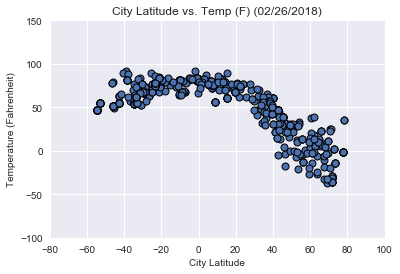

In [274]:
plt.scatter(x=weather_df["Latitude"], 
            y=weather_df["Temperature (Fahrenheit)"],
            edgecolors = "black",
            marker = "o",
            linewidth = 1.0)         
plt.title("City Latitude vs. Temp (F) (02/26/2018)")
plt.xlabel('City Latitude',fontsize=10)
plt.ylabel('Temperature (Fahrenheit)',fontsize=10)
plt.xlim(-80,100)
plt.ylim(-100,150)        
sea.set()

plt.savefig("TemperatureInWorldCities3.png")

plt.show

<function matplotlib.pyplot.show>

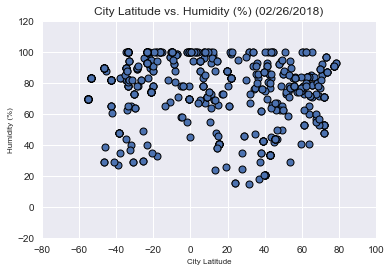

In [275]:
plt.scatter(x=weather_df["Latitude"], 
            y=weather_df["humidity"],
            edgecolors = "black",
            marker = "o",
            linewidth = 1.0)         
plt.title("City Latitude vs. Humidity (%) (02/26/2018)")
plt.xlabel('City Latitude',fontsize=8)
plt.ylabel('Humidity (%)',fontsize=8)
plt.xlim(-80,100)
plt.ylim(-20,120)
sea.set()
plt.savefig("HumidityWorldCities1.png")

plt.show

<function matplotlib.pyplot.show>

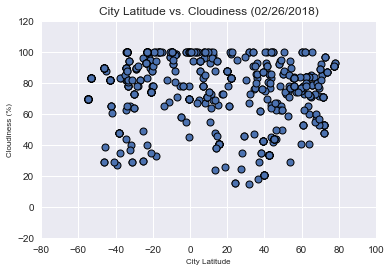

In [276]:
plt.scatter(x=weather_df["Latitude"], 
            y=weather_df["humidity"],
            edgecolors = "black",
            marker = "o",
            linewidth = 1.0)          
plt.title("City Latitude vs. Cloudiness (02/26/2018)")
plt.xlabel('City Latitude',fontsize=8)
plt.ylabel('Cloudiness (%)',fontsize=8)
plt.xlim(-80,100)
plt.ylim(-20,120)
sea.set()
plt.savefig("CloudsWorldCities1.png")

plt.show

<function matplotlib.pyplot.show>

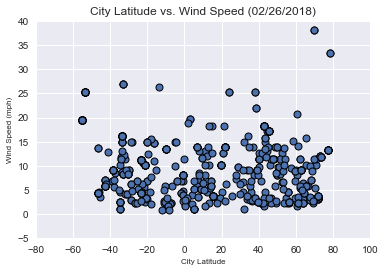

In [277]:
plt.scatter(x=weather_df["Latitude"], 
            y=weather_df["wind speed"],
            edgecolors = "black",
            marker = "o",
            linewidth = 1.0)   
plt.title("City Latitude vs. Wind Speed (02/26/2018)")
plt.xlabel('City Latitude',fontsize=8)
plt.ylabel('Wind Speed (mph)',fontsize=8)
plt.xlim(-80,100)
plt.ylim(-5,40)
sea.set()
plt.savefig("WindSpeedWorldCities1.png")

plt.show